# ⏬ **Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf


# 🧹 **Data Preprocessing**
- Keras data loading documentation: https://keras.io/api/data_loading/image/

### 🧹 **Training Image Preprocessing**

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "./data/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 3115 files belonging to 36 classes.


### 🧹 **Validation Image Preprocessing**

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "./data/validation",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 351 files belonging to 36 classes.


# 🤖 **Model Building**
- CNN Cheatsheet: https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks

In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
# Building convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Build pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


c:\Users\joeln\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Building convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))

# Build pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [7]:
cnn.add(tf.keras.layers.Flatten())

In [8]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))


In [9]:
cnn.add(tf.keras.layers.Dropout(0.5)) # To avoid overfitting

In [10]:
# Output layer
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

# 🔨 **Compiling and Training Phase**

In [11]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,538,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,744,452 (21.91 MB)

 Trainable params: 5,744,452 (21.91 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.0275 - loss: 14.4646 - val_accuracy: 0.0370 - val_loss: 3.5805
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.0457 - loss: 3.5633 - val_accuracy: 0.1282 - val_loss: 3.4338
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.0560 - loss: 3.5279 - val_accuracy: 0.1311 - val_loss: 3.4044
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.0863 - loss: 3.4474 - val_accuracy: 0.2137 - val_loss: 3.2181
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.1094 - loss: 3.3470 - val_accuracy: 0.2450 - val_loss: 3.0657
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.1423 - loss: 3.2273 - val_accuracy: 0.3248 - val_loss: 2.8189
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.1998 - loss: 3.0368 - val_accuracy: 0.3447 - val_loss: 2.6777
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.2407 - loss: 2.8628 - val_accuracy: 0.3989 - 

# 💾 **Save Model and Training History**

In [14]:
cnn.save('trained_model.keras')

In [15]:
training_history

In [16]:
training_history.history # Return dictionary of history

{'accuracy': [0.02985553815960884,
  0.044622793793678284,
  0.0545746386051178,
  0.08860353380441666,
  0.11428571492433548,
  0.14799357950687408,
  0.19486355781555176,
  0.25008025765419006,
  0.3085072338581085,
  0.351845920085907,
  0.41027286648750305,
  0.4500802457332611,
  0.5043338537216187,
  0.5399678945541382,
  0.5547351241111755,
  0.5800963044166565,
  0.6218298673629761,
  0.6308186054229736,
  0.6683788299560547,
  0.6863563656806946,
  0.7030497789382935,
  0.7062600255012512,
  0.7094703316688538,
  0.7338683605194092,
  0.7447832822799683,
  0.7399678826332092,
  0.7576243877410889,
  0.7762439846992493,
  0.7906901836395264,
  0.780738353729248,
  0.773354709148407,
  0.7980738282203674],
 'loss': [6.287806034088135,
  3.561927556991577,
  3.513523578643799,
  3.418161630630493,
  3.3182010650634766,
  3.1846063137054443,
  3.0123555660247803,
  2.808610439300537,
  2.5677413940429688,
  2.3963727951049805,
  2.167328357696533,
  1.9804489612579346,
  1.8376263

In [17]:
training_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [18]:
# Recording Training History in JSON format
import json 
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

# 📈 **Model Evaluation**

In [19]:
# Calculating accuracy of model achieved on validation set
print("Validation Set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation Set Accuracy: 83.76068472862244 %


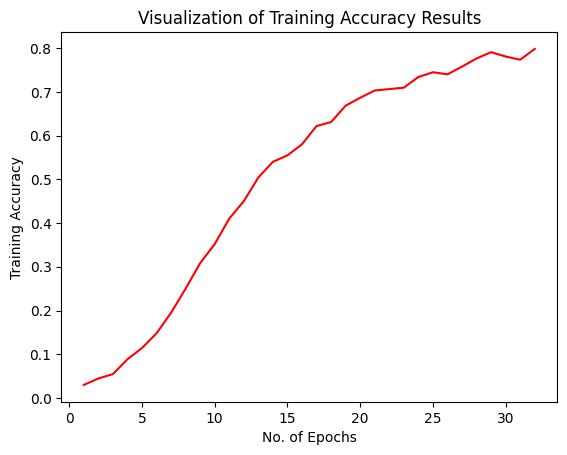

In [21]:
# Accuracy Visualisation
epochs = [i for i in range(1,33)]
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel("No. of Epochs")
plt.ylabel("Training Accuracy")
plt.title("Visualization of Training Accuracy Results")
plt.show()


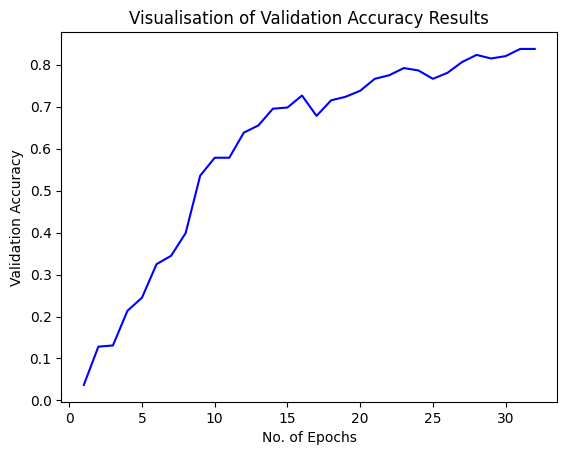

In [22]:
# Accuracy Visualisation
plt.plot(epochs, training_history.history['val_accuracy'], color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Visualisation of Validation Accuracy Results")
plt.show()


- https://www.tensorflow.org/guide/keras/training_with_built_in_methods

In [28]:
training_loss, training_accuracy = cnn.evaluate(training_set)


98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8558 - loss: 0.5281


In [ ]:
validation_loss, validation_accuracy = cnn.evaluate(validation_set)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8036 - loss: 1.0230


In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "./data/test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

test_loss, test_accuracy = cnn.evaluate(test_set)


Found 359 files belonging to 36 classes.
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8056 - loss: 1.0154


----------------------------------------------------------------- END ------------------------------------------------------------------